# Analyses des incidents dans les districts de Boston de 2015 à 2018

#### Romain SOUCHON - Célien KOEBERLÉ - Quentin PASCAL

In [35]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np #pour gerer les moyennes + covariances +++

import csv
import pandas as pd

In [36]:
data = []
title_name = []
cpt = 0
with open('crime.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    fieldnames = reader.fieldnames

    for row in reader:
        if(cpt != 0):
            cpt+=1
        else:
            data.append(row)


<b> Idées d'analyses : </b>

- Comment la criminalité a-t-elle évolué au fil des années ?
- Est-il possible de prédire où et quand un crime sera commis ?
- Quels sont les quartiers de la ville qui ont évolué au cours de cette période ?
- Dans quel district la plupart des crimes sont commis ?

In [37]:
#Analyse temporelle (année, mois)
year2015 = []
year2016 = []
year2017 = []
year2018 = []
years = [year2015,year2016,year2017,year2018]
for c in data:
    if(c["YEAR"] == "2015"):
        year2015.append(c)
    elif(c["YEAR"] == "2016"):
        year2016.append(c)
    elif(c["YEAR"] == "2017"):
        year2017.append(c)
    elif(c["YEAR"] == "2018"):
        year2018.append(c)

#print(year2018)

nb_crime2015 = len(year2015)
nb_crime2016 = len(year2016)
nb_crime2017 = len(year2017)
nb_crime2018 = len(year2018)

nb_crime = [nb_crime2015, nb_crime2016, nb_crime2017,nb_crime2018]

years_nb = [2015,2016,2017,2018]
crime_year = {}
for y in years_nb:
    crime_year[str(y)] = nb_crime[years_nb.index(y)]


In [38]:
total_years = []

for y in range(4):
    total_years.append([])
    for m in range(12):
        total_years[y].append([])

for c in data:
    if(c["YEAR"] == "2015"):
        total_years[0][int(c["MONTH"])-1].append(c)
    elif(c["YEAR"] == "2016"):
        total_years[1][int(c["MONTH"])-1].append(c)
    elif(c["YEAR"] == "2017"):
        total_years[2][int(c["MONTH"])-1].append(c)
    elif(c["YEAR"] == "2018"):
        total_years[3][int(c["MONTH"])-1].append(c)

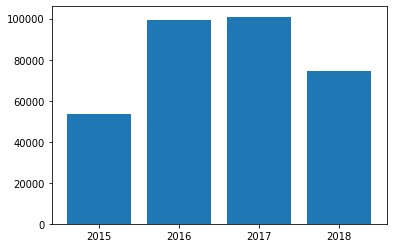

In [39]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.bar(crime_year.keys(), crime_year.values())
plt.show()

Nous pouvons observer que le nombre d'incidents a augmenté en 2016 et 2017 puis elle est a baissé en 2018. 
Par rapport à 2015, on observe quand même une augmentation générale de la criminalité

In [40]:
#Analyse par district
def get_crime_district(data):
    crime_district = {}
    districts = {}
    for c in data:
        if(c["DISTRICT"] != ""):
            if(not c["DISTRICT"] in crime_district):
                crime_district[c["DISTRICT"]] = 0
                districts[c["DISTRICT"]] = []
            crime_district[c["DISTRICT"]] += 1
            districts[c["DISTRICT"]].append(c)
    crime_district = {k: v for k, v in sorted(crime_district.items(), key=lambda item: item[1])}
    return crime_district, districts

crime_district, districts = get_crime_district(data)

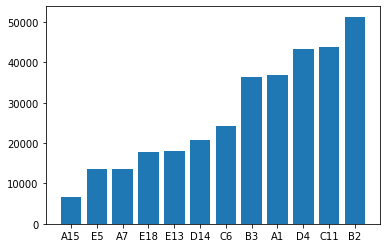

In [41]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.bar(crime_district.keys(), crime_district.values())
plt.show()

Nous pouvons cette fois observer l'hétérogénéité de la criminalité à Boston, dans certains districts sont 10 fois plus d'incidents que dans d'autres
Après avoir analysé les districts de Boston, on se rend compte que plus le revenu moyen par foyer d'un district est bas, plus le nombre d'incidents est élevé. 

In [42]:
#Analyse par types (Offense Code group)
def get_5_most_crime_type(data):
    list_top_crime = []
    crime_type = {}

    top_5 = {}

    for d in data:
        if d["OFFENSE_CODE_GROUP"] in crime_type:
            crime_type[d["OFFENSE_CODE_GROUP"]] += 1
        else:
            crime_type[d["OFFENSE_CODE_GROUP"]] = 1
        
    crime_type = {k: v for k, v in sorted(crime_type.items(), key=lambda item: item[1], reverse = True)}

    top5_crime_type = dict(list(crime_type.items())[:5])

    for keys in top5_crime_type.keys():
        top_5[keys] = []

    for d in data:
        if d["OFFENSE_CODE_GROUP"] in top_5:
            top_5[d["OFFENSE_CODE_GROUP"]].append(d)

    return top5_crime_type, top_5

top5_crime_type, top_5 = get_5_most_crime_type(data)


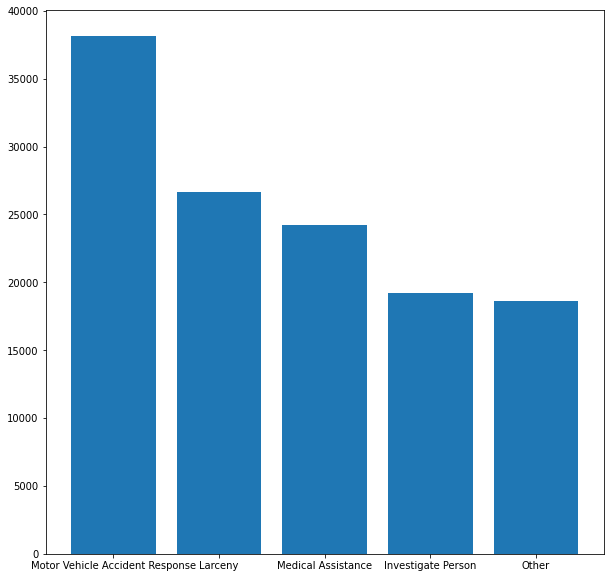

In [43]:
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor('xkcd:white')

top5_crime_type, top_5 = get_5_most_crime_type(data)

plt.bar(top5_crime_type.keys(), top5_crime_type.values())
plt.show()

L'histogramme montre les 5 types d'incidents les plus courants, les accidents de la route, les vols et les assistances médicales sont très courants.
Un résultat difficile à étudier, l'analyse par district qui suit est plus parlante. 

In [44]:
#Analyse des crimes par district en fonction des années
crime_district_annee = []
crime_district_month = []
for ys in years:
    crime_district, districts = get_crime_district(ys)
    crime_district_annee.append(crime_district)


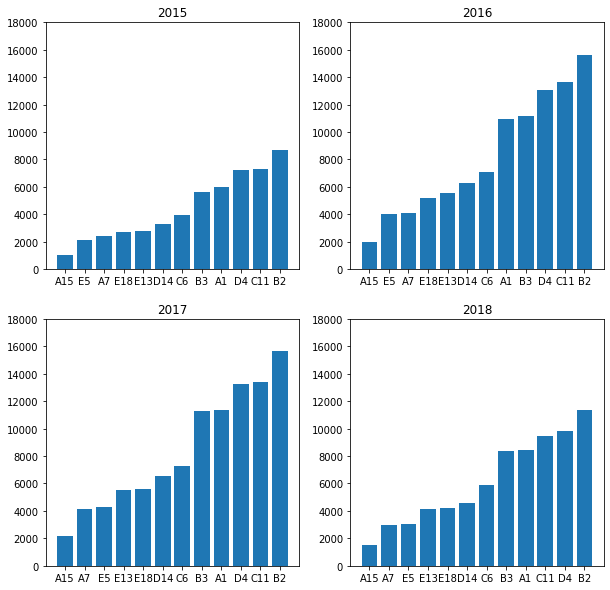

In [45]:
fig = plt.figure(figsize = (10,10))

fig.patch.set_facecolor('xkcd:white')
cpt = 0
for cda in crime_district_annee:
    cpt += 1
    ax = plt.subplot(2,2,cpt)
    ax = plt.ylim(0,18000)
    ax = plt.bar(cda.keys(), cda.values())
    ax = plt.title(years_nb[crime_district_annee.index(cda)])

plt.show()


Nous retrouvons l'augmentation du nombre d'incidents du premier histogramme, de plus, nous pouvons observer que l'ordre des districts reste plus ou moins le même, l'augmentation est donc homogène et s'est appliquée à tous les districts.

In [46]:
#Analyse des types de crimes en fonction des années
crime_type_annee = []
for ys in years:
    top5_crime_type, top_5 = get_5_most_crime_type(ys)
    crime_type_annee.append(top5_crime_type)

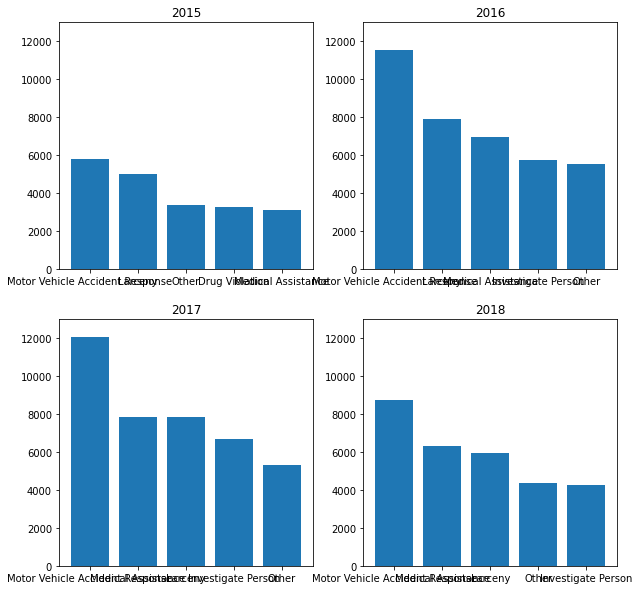

In [47]:
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor('xkcd:white')
cpt = 0

for cda in crime_type_annee:
    cpt += 1
    ax = plt.subplot(2,2,cpt)
    ax = plt.ylim(0,13000)
    ax = plt.bar(cda.keys(), cda.values())
    ax = plt.title(years_nb[crime_type_annee.index(cda)])

plt.show()

De même que pour le nombre d'incidents, les types d'incidents restent les mêmes en fonction des années.

In [48]:
#Analyse des types d'infractions par district
crime_type_district = []
crime_district, districts = get_crime_district(data)
for ds in districts.values():
    top5_crime_type, top_5 = get_5_most_crime_type(ds)
    crime_type_district.append(top5_crime_type)

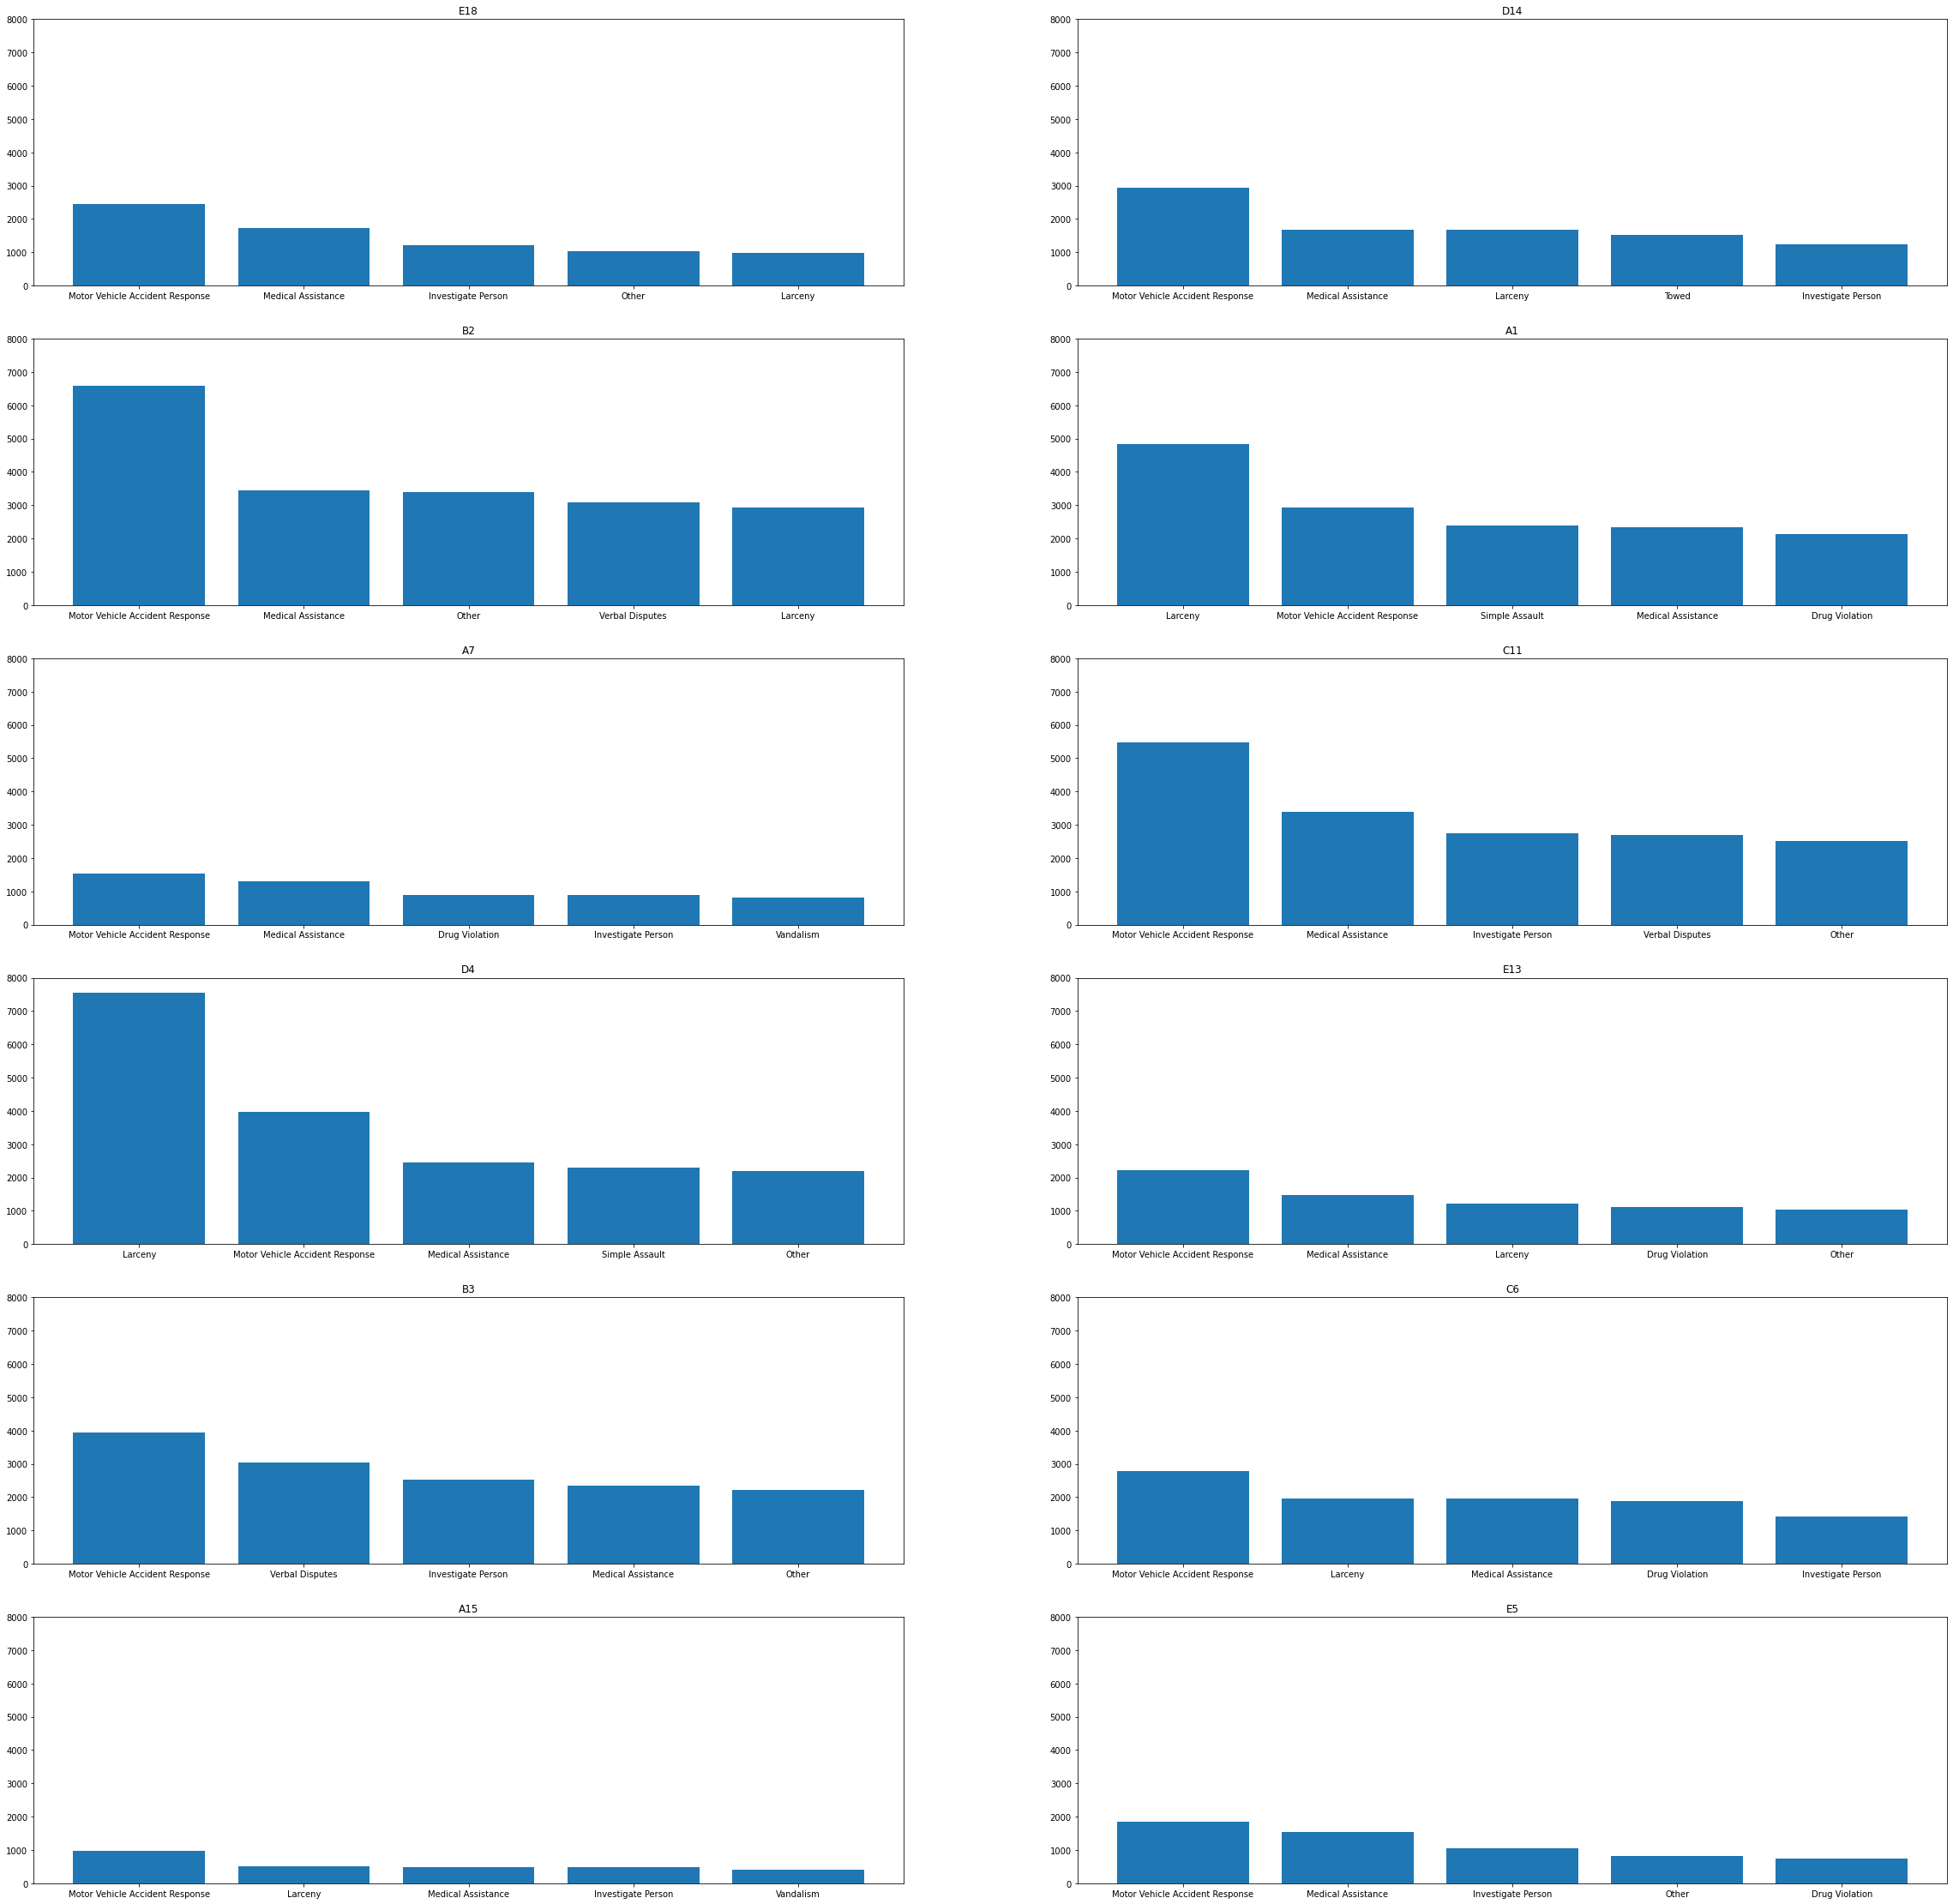

In [49]:
fig = plt.figure(figsize = (40,40))
fig.patch.set_facecolor('xkcd:white')
cpt = 0
for ctd in crime_type_district:
    cpt += 1
    ax = plt.subplot(6,2,cpt)
    ax = plt.ylim(0,8000)
    ax = plt.bar(ctd.keys(), ctd.values())
    ax = plt.title(list(districts.keys())[crime_type_district.index(ctd)])

plt.show()

L'analyse par district est intéressante :

Zone résidentielle (B2) : Accident de la route, urgence médicale et dispute sur la voie publique

Centre-ville (A1) : Vol, assaut, drogue. Des incidents plus axés sur l’argent car le quartier est plus riche


In [50]:
#Prendre les données de chaque district par années et faire un graph qui montre la différence en 2018 et 2015.
diff_crime_district = {}

crime_district2015, districts2015 = get_crime_district(years[0])
crime_district2018, districts2018 = get_crime_district(years[3])

diff_crime2015 = []
diff_crime2018 = []

for ds2015 in districts2015:
    for ds2018 in districts2018:
        if ds2015 == ds2018:
            diff_crime_district[ds2015] = (crime_district2018[ds2018] - crime_district2015[ds2015])
            diff_crime2015.append(crime_district2015[ds2015])
            diff_crime2018.append(crime_district2018[ds2018]) # Analyse de l'évolution du nombre d'incidents dans chaque districts entre deux années






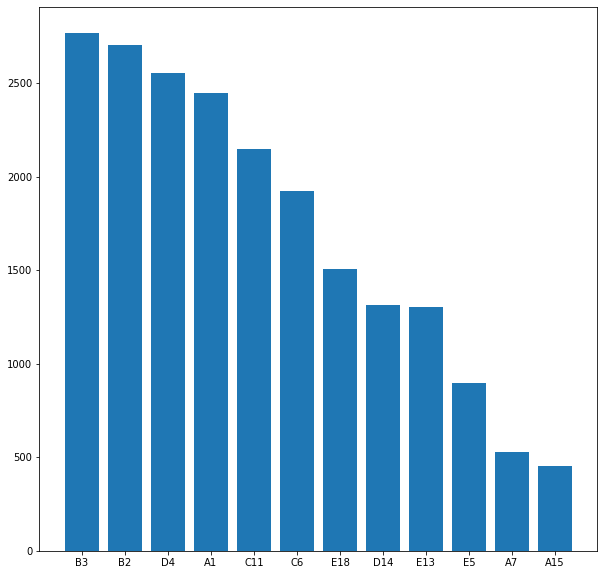

In [51]:
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor('xkcd:white')

diff_crime_district = {k: v for k, v in sorted(diff_crime_district.items(), key=lambda item: item[1], reverse = True)}

plt.bar(diff_crime_district.keys(), diff_crime_district.values(), )
#ax = plt.title(years_nb[crime_district_annee.index(cda)])

plt.show()

Encore une fois, l'évolution reste homogène, il n'y a pas de district qui évolue plus ou moins que les autres

In [52]:
# Correlation des infractions sur les mois de l'année entre deux districts

crime_district_month = []

for ys in total_years:
    for ms in ys:
        crime_district, districts = get_crime_district(ms)
        crime_district_month.append(districts)


crime_b2_month = []
crime_c11_month = []
crime_a15_month = []

for i in range(4):
    crime_b2_month.append([])
    crime_c11_month.append([])
    crime_a15_month.append([])
    for j in range(12):
        crime_b2_month[i].append(0)
        crime_c11_month[i].append(0)
        crime_a15_month[i].append(0)

for cdm in crime_district_month:
    if("B2" in cdm.keys() or "C11" in cdm.keys() or "A15" in cdm.keys()):
        for c in cdm.values():
            for i in c:
                if(i["DISTRICT"] == "B2"):
                    if(i["YEAR"] == "2015"):
                        crime_b2_month[0][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2016"):
                        crime_b2_month[1][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2017"):
                        crime_b2_month[2][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2018"):
                        crime_b2_month[3][int(i["MONTH"])-1]+=1

                if(i["DISTRICT"] == "C11"):
                    if(i["YEAR"] == "2015"):
                        crime_c11_month[0][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2016"):
                        crime_c11_month[1][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2017"):
                        crime_c11_month[2][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2018"):
                        crime_c11_month[3][int(i["MONTH"])-1]+=1
                
                if(i["DISTRICT"] == "A15"):
                    if(i["YEAR"] == "2015"):
                        crime_a15_month[0][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2016"):
                        crime_a15_month[1][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2017"):
                        crime_a15_month[2][int(i["MONTH"])-1]+=1
                    elif(i["YEAR"] == "2018"):
                        crime_a15_month[3][int(i["MONTH"])-1]+=1



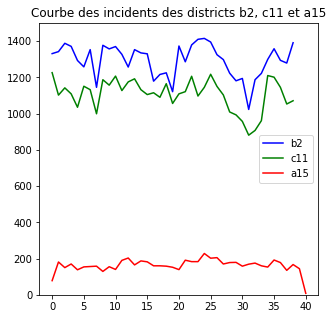

In [53]:
# Courbe de B2 et C11
b2_all_month = []
c11_all_month = []
a15_all_month = []
for i in range(4):
    for v in crime_b2_month[i]:
        if (v > 800): #Permet de ne pas prendre les mois non finis/non renseignés
            b2_all_month.append(v)
    for v in crime_c11_month[i]:
        if (v > 800): #Permet de ne pas prendre les mois non finis/non renseignés
            c11_all_month.append(v)
    for v in crime_a15_month[i]:
        if (v!=0): #Permet de ne pas prendre les mois non finis/non renseignés
            a15_all_month.append(v)

fig = plt.figure(figsize = (5,5))
fig.patch.set_facecolor('xkcd:white')

plt.plot(b2_all_month,'b')
plt.plot(c11_all_month,'g')
plt.plot(a15_all_month,'r')
plt.ylim(0,1500)
plt.title("Courbe des incidents des districts b2, c11 et a15")
plt.legend(["b2", "c11","a15"])
plt.show()

Nous pouvons observer que les deux districts voisins (B2 et C11) fluctuent plus ou moins de la même façon, en tout cas plus qu'avec le district A15 à l'autre bout de la ville. Le nombre d'incidents dépend donc de la localisation même si la localisation est aussi responsable d'autres facteurs (type d'habitations, revenu)

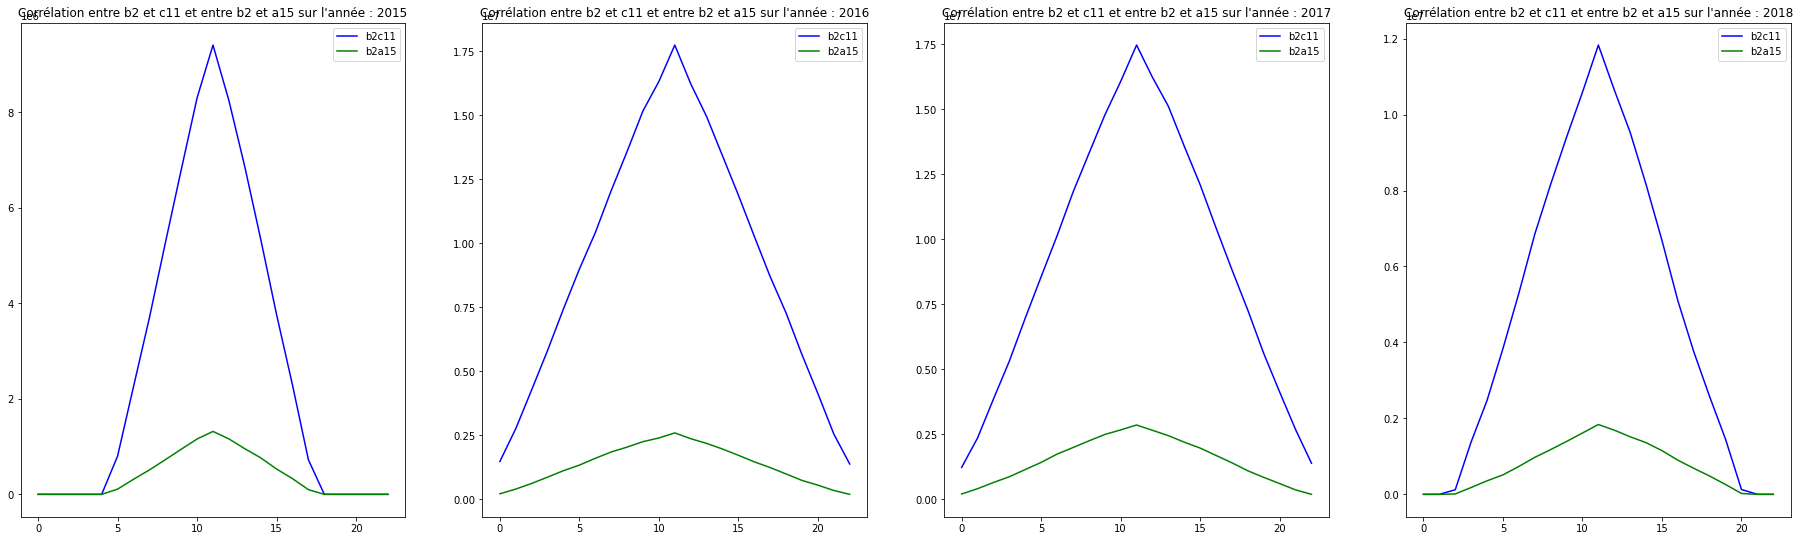

In [54]:
# Correlation entre B2 et C11

fig = plt.figure(figsize = (40,20))
fig.patch.set_facecolor('xkcd:white')
cpt = 0
for i in range(4):
    cpt += 1
    corrb2c11 = np.correlate(crime_b2_month[i], crime_c11_month[i], mode="full")
    corrb2a15 = np.correlate(crime_b2_month[i], crime_a15_month[i], mode="full")
    ax = plt.subplot(2,5,cpt)
    plt.plot(corrb2c11,"b")
    plt.plot(corrb2a15,"g")
    
    ax = plt.title("Corrélation entre b2 et c11 et entre b2 et a15 sur l'année : " + str(2015 + i))
    ax = plt.legend(["b2c11","b2a15"])

plt.show()

En analysant les courbes, on observe que les districts voisins sont plus corrélés que les districts éloignés.


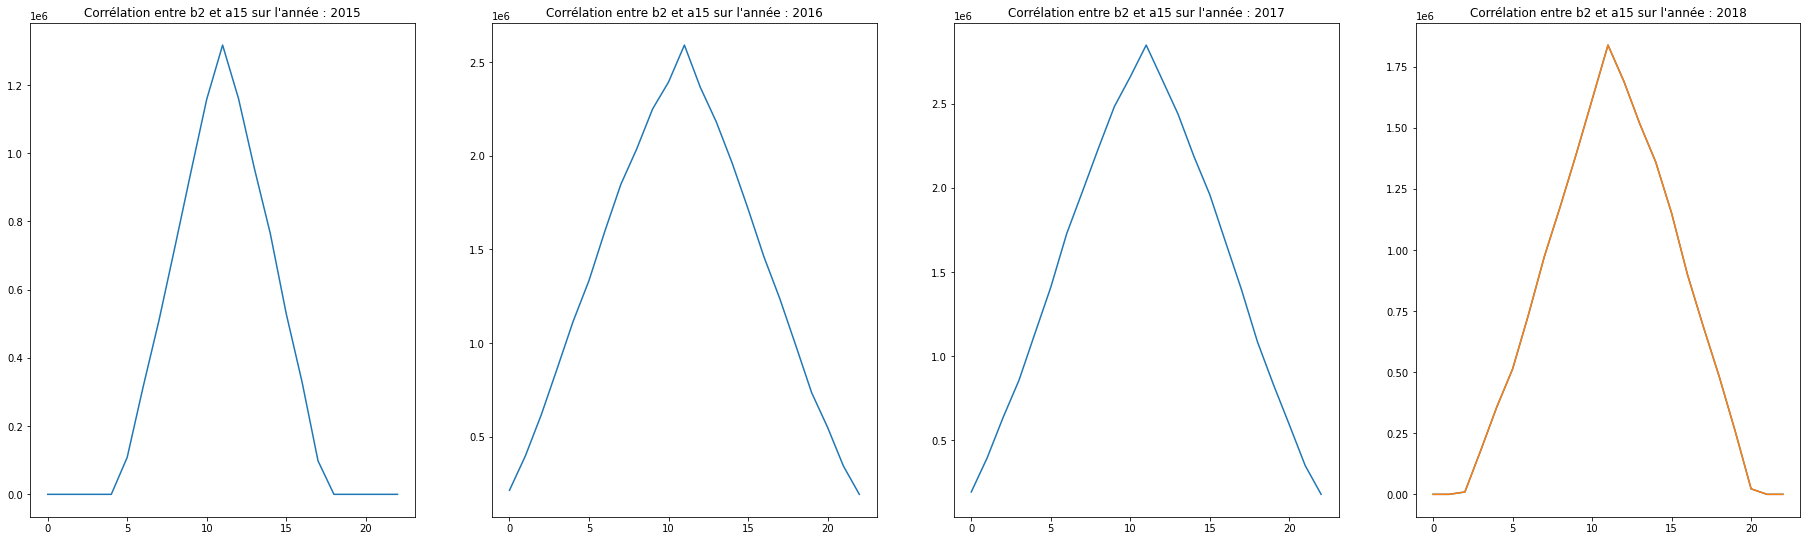

In [55]:
# Correlation entre B2 et A15

fig = plt.figure(figsize = (40,20))
fig.patch.set_facecolor('xkcd:white')
cpt = 0
for i in range(4):
    cpt += 1
    corr = np.correlate(crime_b2_month[i], crime_a15_month[i], mode="full")
    ax = plt.subplot(2,5,cpt)
    plt.plot(corr)
    ax = plt.title("Corrélation entre b2 et a15 sur l'année : " + str(2015 + i))
plt.plot(corr)
plt.show()

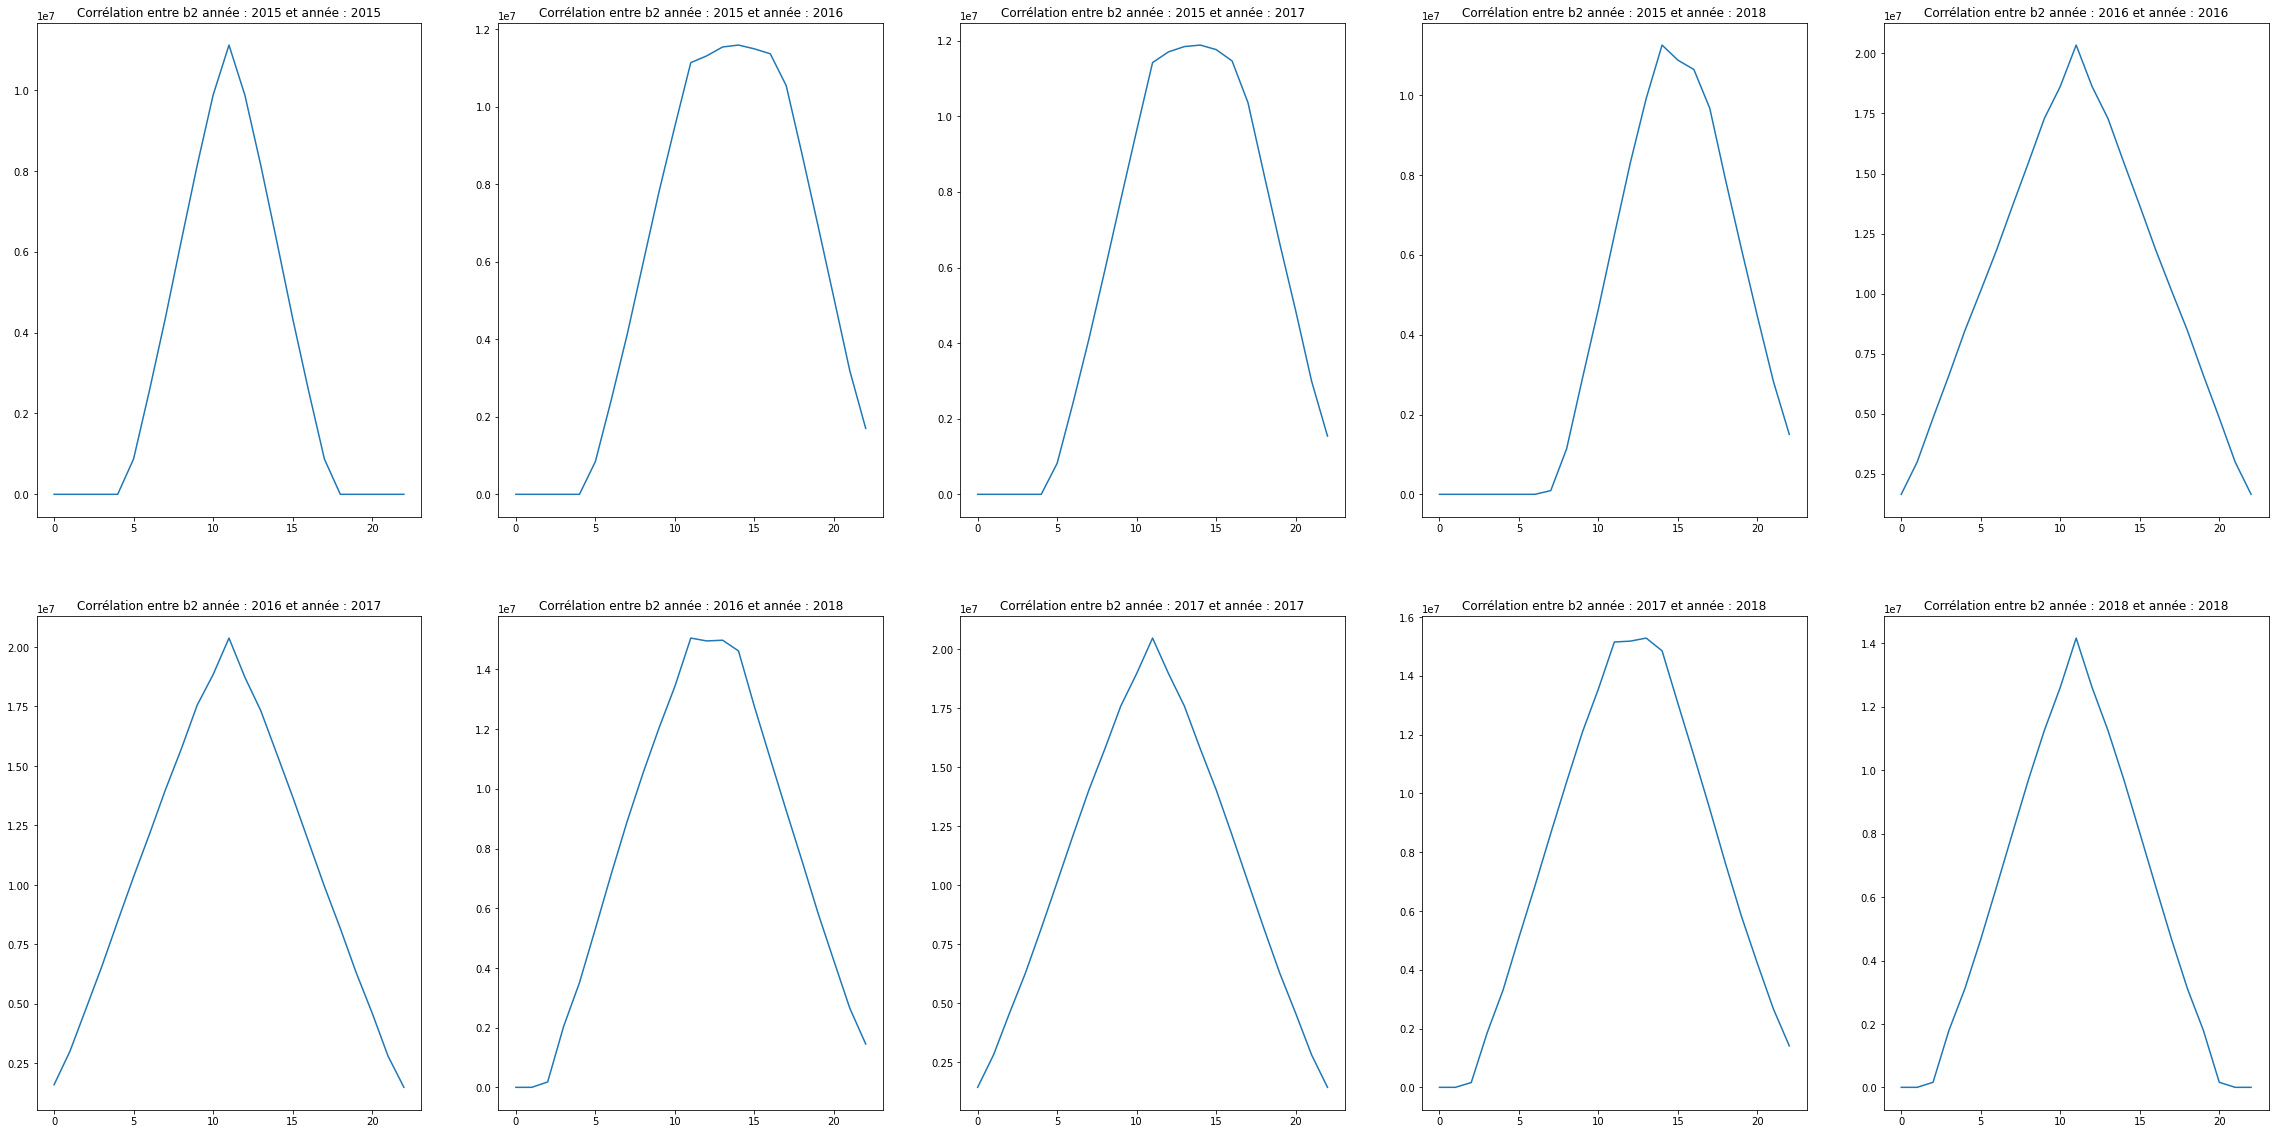

In [56]:
# Graph des inc# Correlation B2

fig = plt.figure(figsize = (40,20))
fig.patch.set_facecolor('xkcd:white')
cpt = 0
for i in range(4):
    for j in range(i,4):
        cpt += 1
        corr = np.correlate(crime_b2_month[i], crime_b2_month[j], mode="full")
        ax = plt.subplot(2,5,cpt)
        plt.plot(corr)
        ax = plt.title("Corrélation entre b2 année : " + str(2015 + i) + " et année : " + str(2015 + j))

plt.show()

### Prédictions

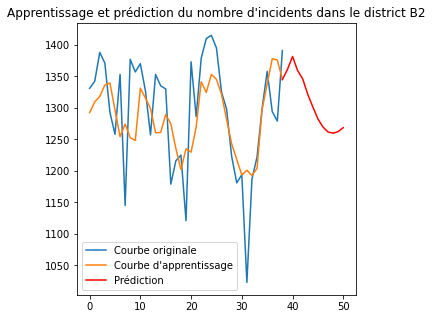

In [57]:
from statsmodels.tsa.arima.model import ARIMA
b2_all_month = []

fig = plt.figure(figsize = (5,5))
fig.patch.set_facecolor('xkcd:white')

for i in range(4):
    for v in crime_b2_month[i]:
        if (v > 800): #Permet de ne pas prendre les mois non finis/non renseignés
            b2_all_month.append(v)
        

df = pd.DataFrame(b2_all_month)
model = ARIMA(df, order=(3, 0, 1))# AR
model_fit = model.fit()

fig = model_fit.predict(start=0, end=50)
#print(fig)
plt.plot(b2_all_month)
plt.plot(fig[0:len(b2_all_month)])
plt.plot(fig[len(b2_all_month)-1:], 'r')

plt.title("Apprentissage et prédiction du nombre d'incidents dans le district B2")
plt.legend(["Courbe originale", "Courbe d'apprentissage", "Prédiction"])
plt.show()


La courbe d'apprentissage est fidèle à l'originale.
La prédiction sur les dix semaines suivantes est à la baisse pour compenser l'augmentation entre le 30 et le 40ème mois. De plus elle est en dents de scie comme l'originale, la prédiction semble donc cohérente.

In [58]:
total_days = []
for y in range(4):
    total_days.append([])
    for m in range(12):
        total_days[y].append([])
        for d in range(31):
            total_days[y][m].append(0)
for c in data:
    if(c["YEAR"] == "2015"):
        total_days[0][int(c["MONTH"])-1][int(c["OCCURRED_ON_DATE"].split("-")[2].split(" ")[0])-1]+=1
    elif(c["YEAR"] == "2016"):
        total_days[1][int(c["MONTH"])-1][int(c["OCCURRED_ON_DATE"].split("-")[2].split(" ")[0])-1]+=1
    elif(c["YEAR"] == "2017"):
        total_days[2][int(c["MONTH"])-1][int(c["OCCURRED_ON_DATE"].split("-")[2].split(" ")[0])-1]+=1
    elif(c["YEAR"] == "2018"):
        total_days[3][int(c["MONTH"])-1][int(c["OCCURRED_ON_DATE"].split("-")[2].split(" ")[0])-1]+=1


all_crime_days = []
for y in total_days:
    for m in y:
        for d in m:
            if(d!=0):
                all_crime_days.append(d)


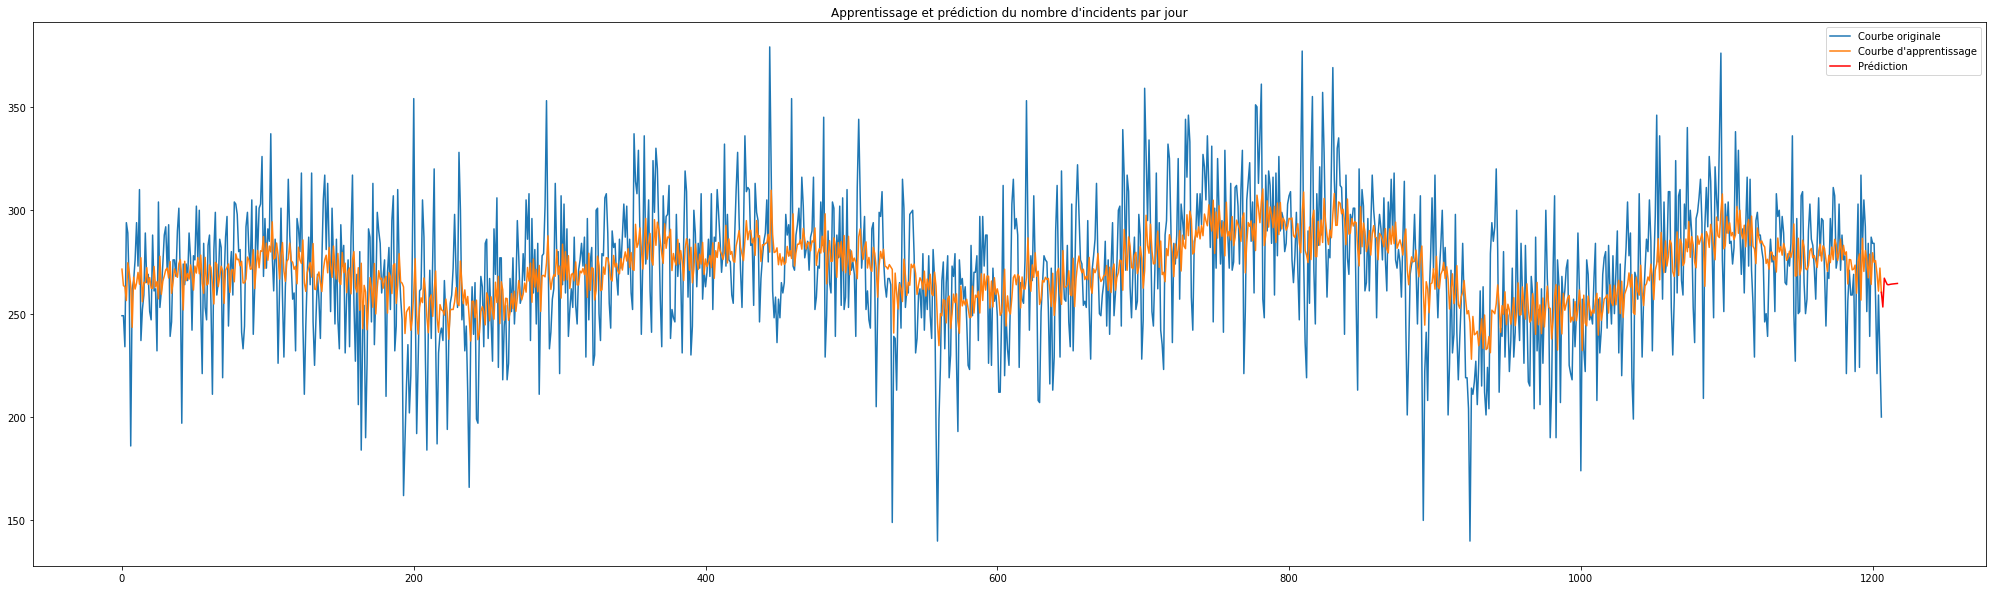

In [59]:
fig = plt.figure(figsize = (35,10))
fig.patch.set_facecolor('xkcd:white')
        

df = pd.DataFrame(all_crime_days)
model = ARIMA(df, order=(3, 0, 1))# AR
model_fit = model.fit()

fig = model_fit.predict(start=0, end=len(all_crime_days)+10)


# print(fig)
plt.plot(all_crime_days)
plt.plot(fig[0:len(all_crime_days)])
plt.plot(fig[len(all_crime_days)-1:], 'r')

plt.title("Apprentissage et prédiction du nombre d'incidents par jour")
plt.legend(["Courbe originale", "Courbe d'apprentissage", "Prédiction"])
plt.show()

Même constat pour la prédiction en prenant les données de chaque jour.

### Approfondissements

Analyse de corrélation entre période et infractions (hivers/été d'une année à l'autre)

Analyse de la conséquence d'un incident sur les incidents des districts voisins

Attribuer des phénomènes causant l'augmentation ou diminution des incidents (achat voiture/plus de personnes/catastrophe)